In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
np.random.seed(42)

In [4]:
apartments=[f"Apt_{i}" for i in range(1,21)]

In [5]:
dates=pd.date_range(start="2025-07-01",periods=30,freq="D")

In [6]:
data={
"Date":np.tile(dates,len(apartments)),
"Apartment":np.repeat(apartments,len(dates)),
"Electricity_usage":np.random.normal(loc=20,scale=5,size=len(dates)* len(apartments))
                                     }                                   

In [7]:
df=pd.DataFrame(data)

In [8]:
df["Electricity_usage"]=df["Electricity_usage"].round(2)

In [9]:
print(df.isnull().sum())

Date                 0
Apartment            0
Electricity_usage    0
dtype: int64


In [10]:
print(df.describe())

                      Date  Electricity_usage
count                  600         600.000000
mean   2025-07-15 12:00:00          19.932500
min    2025-07-01 00:00:00           3.790000
25%    2025-07-08 00:00:00          16.530000
50%    2025-07-15 12:00:00          20.040000
75%    2025-07-23 00:00:00          23.112500
max    2025-07-30 00:00:00          39.260000
std                    NaN           4.861071


In [11]:
print(df.dtypes)

Date                 datetime64[ns]
Apartment                    object
Electricity_usage           float64
dtype: object


In [22]:
usage_per_apartment= df.groupby("Apartment")["Electricity_usage"].sum().sort_values
print(usage_per_apartment)

<bound method Series.sort_values of Apartment
Apt_1     571.80
Apt_10    616.09
Apt_11    642.31
Apt_12    568.99
Apt_13    634.22
Apt_14    604.33
Apt_15    591.38
Apt_16    606.97
Apt_17    570.33
Apt_18    549.49
Apt_19    586.61
Apt_2     581.81
Apt_20    613.14
Apt_3     601.93
Apt_4     596.99
Apt_5     585.76
Apt_6     641.82
Apt_7     609.87
Apt_8     607.18
Apt_9     578.48
Name: Electricity_usage, dtype: float64>


In [16]:
daily_avg=df.groupby("Date")["Electricity_usage"].mean()
print(daily_avg.head())

Date
2025-07-01    21.0440
2025-07-02    20.8695
2025-07-03    19.5685
2025-07-04    20.9855
2025-07-05    19.7835
Name: Electricity_usage, dtype: float64


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
print(df.columns)
print(df.head())

Index(['Date', 'Apartment', 'Electricity_usage'], dtype='object')
        Date Apartment  Electricity_usage
0 2025-07-01     Apt_1              22.48
1 2025-07-02     Apt_1              19.31
2 2025-07-03     Apt_1              23.24
3 2025-07-04     Apt_1              27.62
4 2025-07-05     Apt_1              18.83


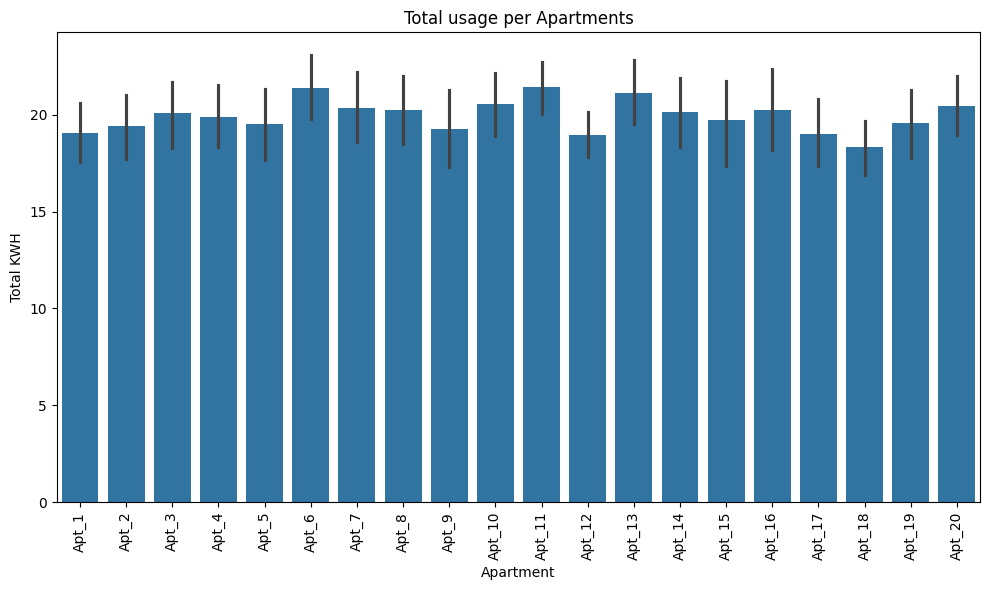

In [27]:
plt.figure(figsize=(10,6))
sns.barplot(x="Apartment", y="Electricity_usage", data=df)
plt.xticks(rotation=90)
plt.title("Total usage per Apartments")
plt.xlabel("Apartment")
plt.ylabel("Total KWH")
plt.tight_layout()
plt.show()

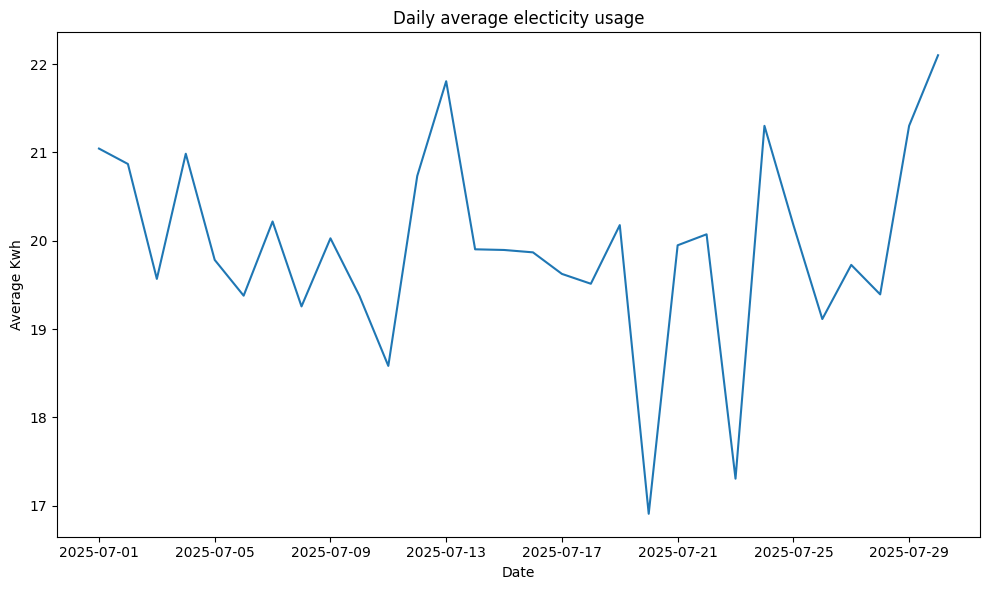

In [28]:
plt.figure(figsize=(10,6))
sns.lineplot(x=daily_avg.index, y=daily_avg.values)
plt.title("Daily average electicity usage")
plt.xlabel("Date")
plt.ylabel("Average Kwh")
plt.tight_layout()
plt.show()